In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import numpy as np

In [2]:
cars =pd.read_csv(r'Cars.csv')
cars.head()

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149


In [3]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   HP      81 non-null     int64  
 1   MPG     81 non-null     float64
 2   VOL     81 non-null     int64  
 3   SP      81 non-null     float64
 4   WT      81 non-null     float64
dtypes: float64(3), int64(2)
memory usage: 3.3 KB


In [4]:
cars.describe()

,HP,MPG,VOL,SP,WT
count,81.000000,81.000000,81.000000,81.000000,81.000000
mean,117.469136,34.422076,98.765432,121.540272,32.412577
std,57.113502,9.131445,22.301497,14.181432,7.492813
min,49.000000,12.101263,50.000000,99.564907,15.712859
25%,84.000000,27.856252,89.000000,113.829145,29.591768
50%,100.000000,35.152727,101.000000,118.208698,32.734518
75%,140.000000,39.531633,113.000000,126.404312,37.392524
max,322.000000,53.700681,160.000000,169.598513,52.997752


In [5]:
cars.isna().sum()

HP     0
MPG    0
VOL    0
SP     0
WT     0
dtype: int64

In [6]:
cars.duplicated()

0     False
1     False
2     False
3     False
4     False
      ...  
76    False
77    False
78    False
79    False
80    False
Length: 81, dtype: bool

In [7]:
cars.shape

(81, 5)

# correlation

In [9]:
cars.corr()

,HP,MPG,VOL,SP,WT
HP,1.000000,-0.725038,0.077459,0.973848,0.076513
MPG,-0.725038,1.000000,-0.529057,-0.687125,-0.526759
VOL,0.077459,-0.529057,1.000000,0.102170,0.999203
SP,0.973848,-0.687125,0.102170,1.000000,0.102439
WT,0.076513,-0.526759,0.999203,0.102439,1.000000


# EDA

In [11]:
from seaborn import scatterplot
import warnings
warnings.filterwarnings('ignore')

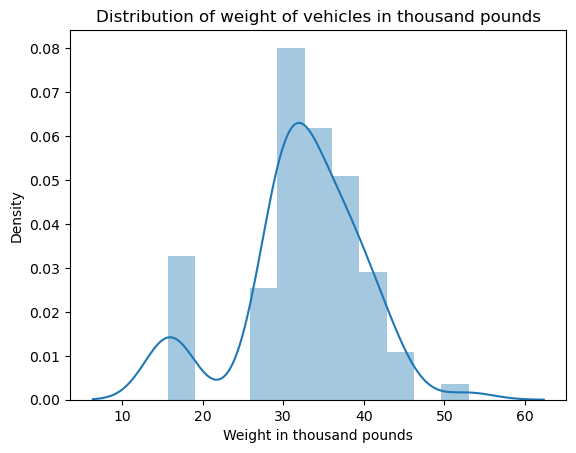

In [12]:
sns.distplot(x=cars['WT'])
plt.title('Distribution of weight of vehicles in thousand pounds')
plt.xlabel('Weight in thousand pounds')
plt.show()

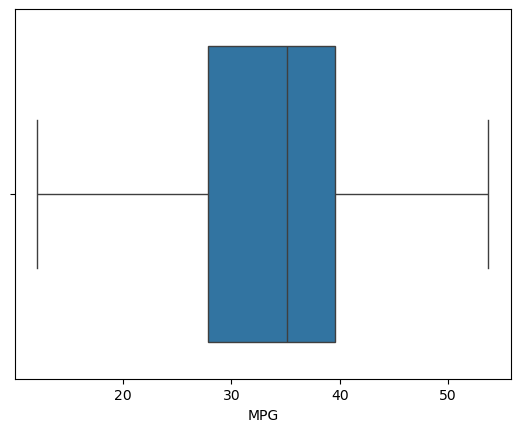

In [13]:
sns.boxplot(x=cars['MPG'])
plt.show()

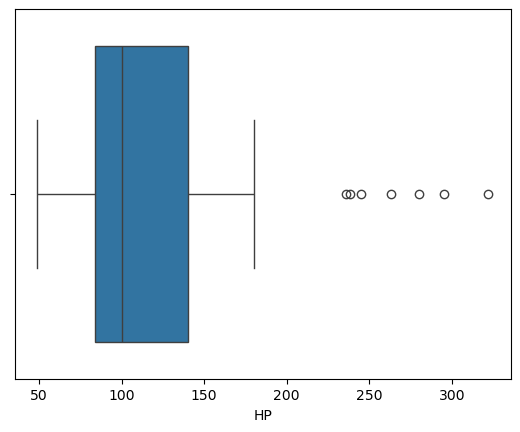

In [14]:
sns.boxplot(x=cars['HP'])
plt.show()

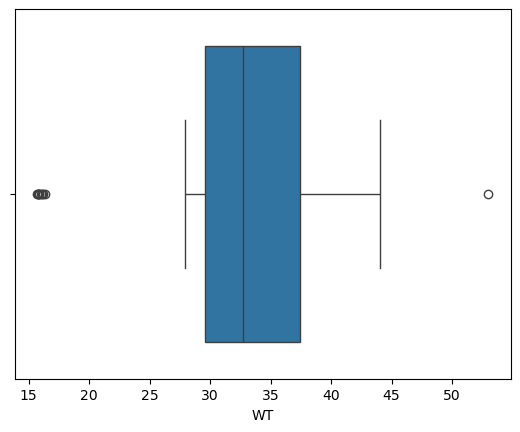

In [15]:
sns.boxplot(x=cars['WT'])
plt.show()

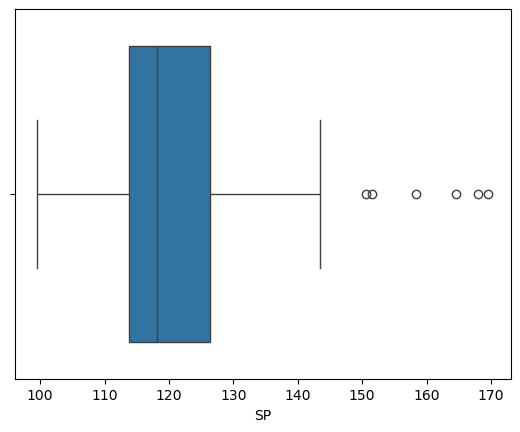

In [16]:
sns.boxplot(x=cars['SP'])
plt.show()

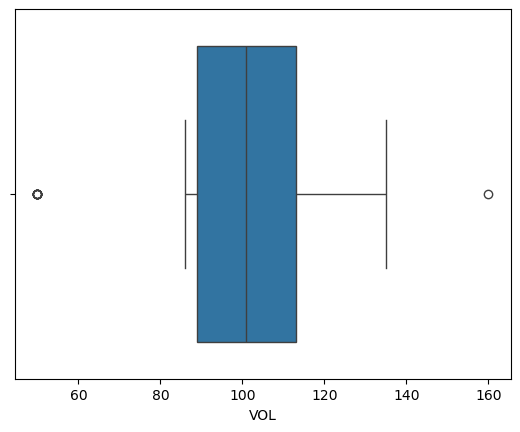

In [17]:
sns.boxplot(x=cars['VOL'])
plt.show()

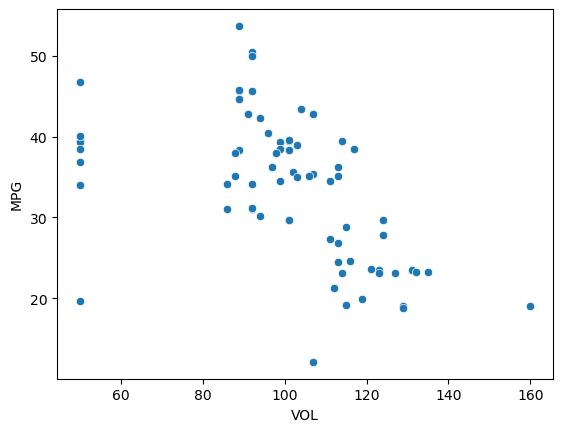

In [18]:
scatterplot(x=cars['VOL'],y=cars['MPG'])
plt.show()

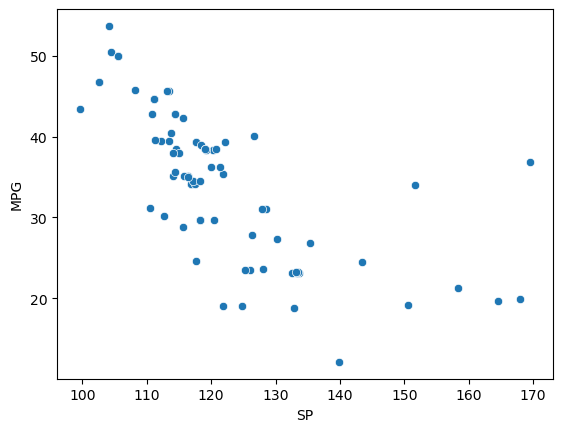

In [19]:
scatterplot(x=cars['SP'],y=cars['MPG'])
plt.show()

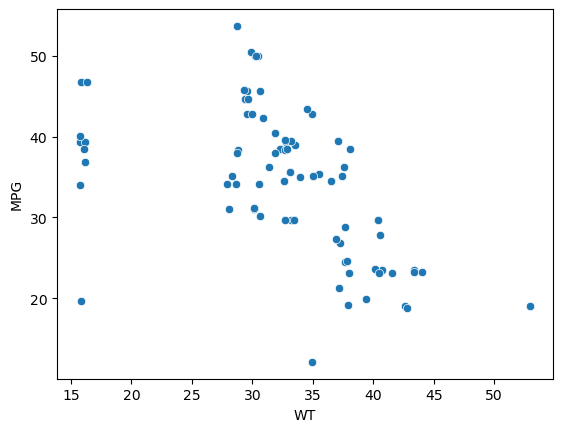

In [20]:
sns.scatterplot(x=cars['WT'],y=cars['MPG'])
plt.show()

# Correlation

In [22]:
cars.corr()

,HP,MPG,VOL,SP,WT
HP,1.000000,-0.725038,0.077459,0.973848,0.076513
MPG,-0.725038,1.000000,-0.529057,-0.687125,-0.526759
VOL,0.077459,-0.529057,1.000000,0.102170,0.999203
SP,0.973848,-0.687125,0.102170,1.000000,0.102439
WT,0.076513,-0.526759,0.999203,0.102439,1.000000


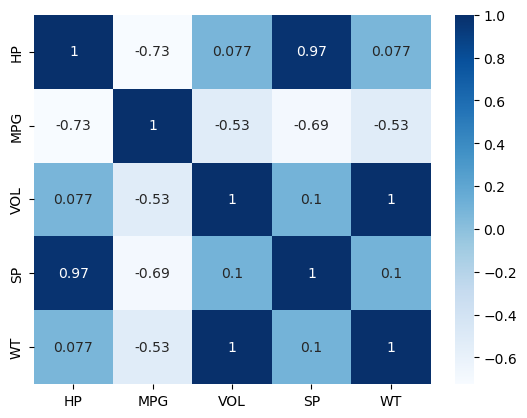

In [23]:
sns.heatmap(cars.corr(),cmap='Blues',annot=True)
plt.show()

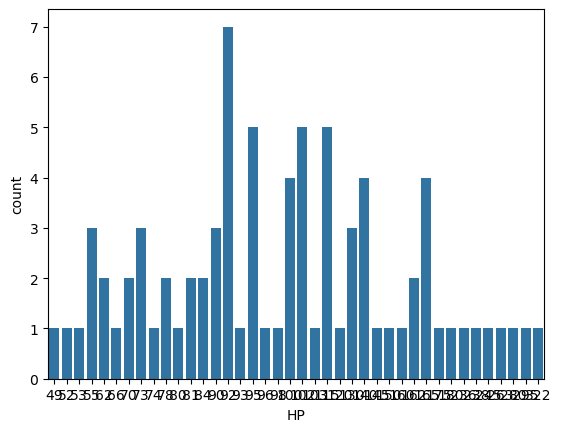

In [24]:
sns.countplot(x=cars['HP'])
plt.show()

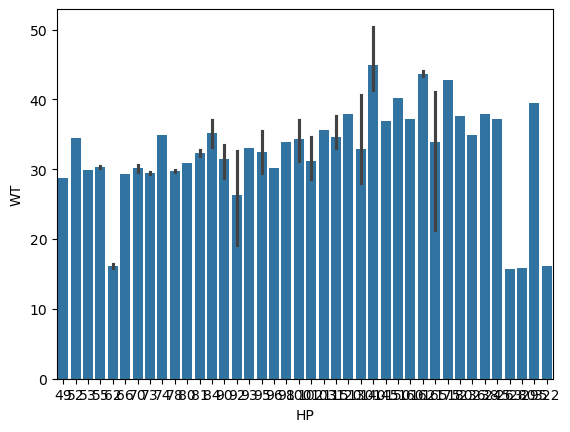

In [25]:
sns.barplot(x=cars['HP'],y=cars['WT'])
plt.show()

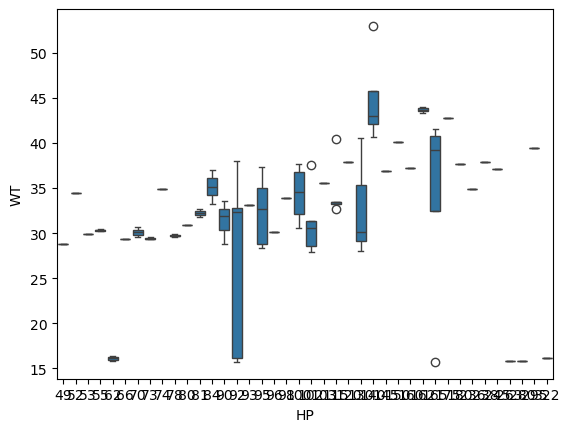

In [26]:
sns.boxplot(x=cars['HP'],y=cars['WT'])
plt.show()

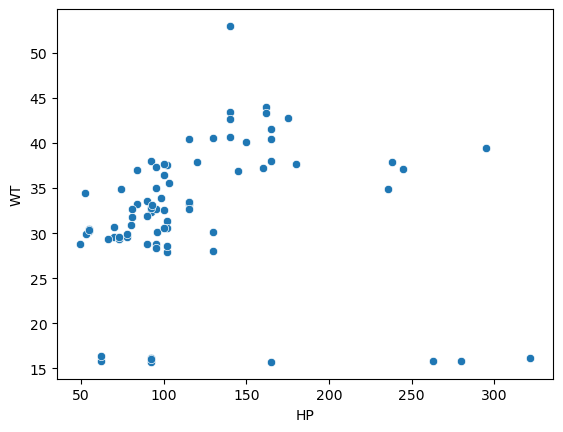

In [27]:
sns.scatterplot(x=cars['HP'],y=cars['WT'])
plt.show()

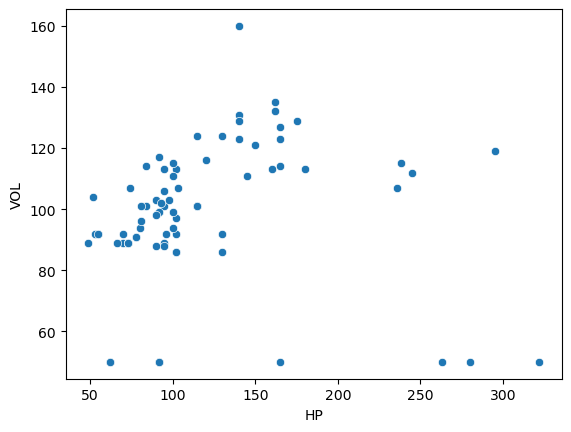

In [28]:
sns.scatterplot(x=cars['HP'],y=cars['VOL'])
plt.show()

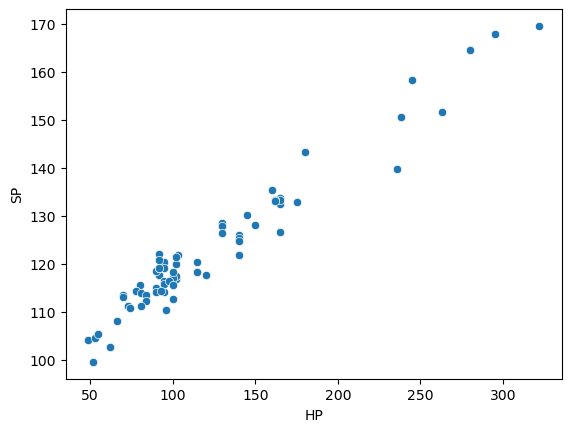

In [29]:
sns.scatterplot(x=cars['HP'],y=cars['SP'])
plt.show()

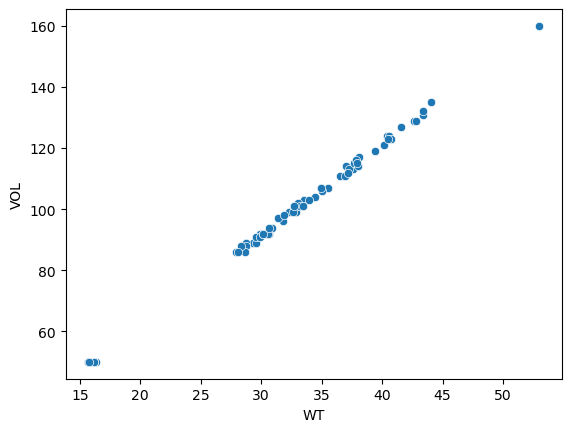

In [30]:
sns.scatterplot(x=cars['WT'],y=cars['VOL'])
plt.show()

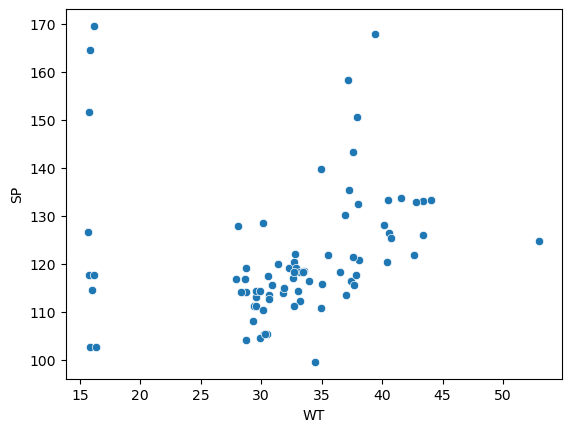

In [31]:
sns.scatterplot(x=cars['WT'],y=cars['SP'])
plt.show()

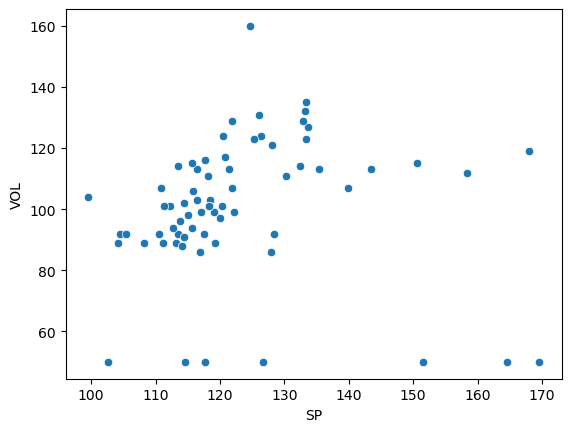

In [32]:
sns.scatterplot(x=cars['SP'],y=cars['VOL'])
plt.show()

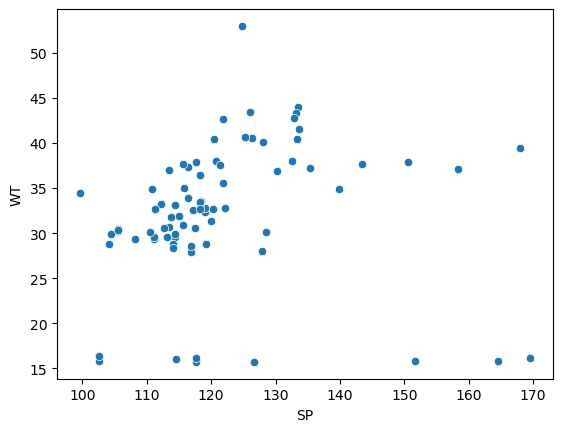

In [69]:
sns.scatterplot(x=cars['SP'],y=cars['WT'])
plt.show()

In [65]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [71]:
cars[['HP','WT','VOL','SP']]=sc.fit_transform(cars[['HP','WT','VOL','SP']])

In [75]:
np.round(cars.describe(),3)

,HP,MPG,VOL,SP,WT
count,81.000,81.000,81.000,81.000,81.000
mean,-0.000,34.422,0.000,0.000,0.000
std,1.006,9.131,1.006,1.006,1.006
min,-1.206,12.101,-2.200,-1.559,-2.243
25%,-0.590,27.856,-0.441,-0.547,-0.379
50%,-0.308,35.153,0.101,-0.236,0.043
75%,0.397,39.532,0.642,0.345,0.669
max,3.603,53.701,2.763,3.410,2.764


In [79]:
import statsmodels.formula.api as smf
ml_v=smf.ols('MPG~VOL',data=cars).fit()
ml_v.rsquared

0.2799008651122705

In [83]:
np.round(ml_v.rsquared,2)

0.28

In [89]:
ml_w=smf.ols('MPG~WT',data=cars).fit()
ml_w.rsquared

0.27747513892701237

In [101]:
ml_sp=smf.ols('MPG~SP',data=cars).fit()
ml_sp.rsquared

0.4721402334141218

In [103]:
ml_hp=smf.ols('MPG~HP',data=cars).fit()
ml_hp.rsquared

0.5256806086282022

In [105]:
ml_w=smf.ols('MPG~WT',data=cars).fit()
np.round(ml_w.rsquared,2)

0.28

In [107]:
ml_sp=smf.ols('MPG~HP',data=cars).fit()
np.round(ml_w.rsquared,2)

0.28

In [109]:
ml_hp=smf.ols('MPG~SP',data=cars).fit()
np.round(ml_w.rsquared,2)

0.28

In [120]:
ml_w.params

Intercept    34.422076
WT           -4.780288
dtype: float64

In [124]:
model = smf.ols('MPG~WT+VOL+SP+HP',data=cars).fit()

In [132]:
np.round(model.rsquared,2)

0.77

In [134]:
model.params

Intercept    34.422076
WT            2.982842
VOL          -7.448031
SP            5.575816
HP          -11.660955
dtype: float64

In [138]:
ml_vol=smf.ols('MPG~VOL',data=cars).fit()
ml_vol.rsquared

0.2799008651122705

In [140]:
ml_vol.params

Intercept    34.422076
VOL          -4.801137
dtype: float64